<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.2
</font><br>
<font size=4>
Deep learning method
</font>

**First-Name: Zahra**

**Last-Name: Soukhtedel**

**Student-Id: 98105138**

# Download Data

##### Execute the cell below to download the data required for your homework.

In [5]:
! pip install gdown

In [6]:
import gdown

url = 'https://drive.google.com/uc?id=1-2zT-_bKjN2o2QxwSviFwbCzcWE2PnkJ'

output = 'dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-2zT-_bKjN2o2QxwSviFwbCzcWE2PnkJ
To: /content/dataset.zip
100%|██████████| 368M/368M [00:01<00:00, 226MB/s]


'dataset.zip'

In [7]:
! unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_30_mask.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_23_mask.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_27_mask.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_21_mask.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_5_mask.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_15.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_26.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_1.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_5.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_6.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_18.tif  
  inflating: mri_scans/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_9.tif  
  inflating: mri_

# Import

In [1]:
import os
import numpy as np
import seaborn as sns
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
import random
import pandas as pd
import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display

# Config

In [2]:

RANDOM_SEED = 42 # Must be used wherever can be used

torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Load and Process Data

##### This dataset contains brain MRI images and manual FLAIR abnormality segmentation masks, where each pixel value of masks indicates the presence or absence of cancer (0 and 1, respectively). The images correspond to 110 patients whose IDs are available in the patient_ids.csv file.


In [4]:
data = pd.read_csv('patient_ids.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      110 non-null    object
dtypes: object(1)
memory usage: 1008.0+ bytes


In [5]:
data.head()

,id
0,TCGA_CS_4941
1,TCGA_CS_4942
2,TCGA_CS_4943
3,TCGA_CS_4944
4,TCGA_CS_5393



### **Exercise 1 (5 points)**:

##### Please use the patient_ids.csv file and the images inside the mri_scans folder to generate a Pandas dataframe named mri_df. This dataframe should have columns labeled "patient_id", "image_path", and "mask_path".

In [6]:
# TODO
patient_id = []
image_path = []
mask_path = []
arr = os.listdir('/content/mri_scans')
print(arr)
for i in range(len(arr)):
  id = str(arr[i])
  sub_arr = os.listdir('/content/mri_scans/'+ id)
  size = int(len(sub_arr)/2)
  for j in range(1, size+1):
    patient_id.append(id[:12])
    image_path.append('/content/mri_scans/' + id + "/" + id + "_" + str(j) + ".tif")
    mask_path.append('/content/mri_scans/' + id + "/" + id  + "_" + str(j) + "_mask.tif")

mri_df = pd.DataFrame({
    'patient_id' : patient_id,
    'image_path' : image_path,
    'mask_path' : mask_path
    })


assert len(mri_df) == 3929
mri_df.head()

['TCGA_DU_5871_19941206', 'TCGA_DU_7294_19890104', 'TCGA_CS_4942_19970222', 'TCGA_CS_4943_20000902', 'TCGA_DU_A5TR_19970726', 'TCGA_FG_6692_20020606', 'TCGA_HT_7856_19950831', 'TCGA_CS_6290_20000917', 'TCGA_DU_7309_19960831', 'TCGA_CS_6668_20011025', 'TCGA_HT_7877_19980917', 'TCGA_DU_5872_19950223', 'TCGA_CS_6666_20011109', 'TCGA_FG_A4MU_20030903', 'TCGA_FG_A60K_20040224', 'TCGA_FG_6689_20020326', 'TCGA_HT_7686_19950629', 'TCGA_CS_5397_20010315', 'TCGA_HT_7608_19940304', 'TCGA_DU_6400_19830518', 'TCGA_DU_8162_19961029', 'TCGA_CS_5396_20010302', 'TCGA_DU_6401_19831001', 'TCGA_DU_6407_19860514', 'TCGA_CS_6669_20020102', 'TCGA_DU_7306_19930512', 'TCGA_DU_7301_19911112', 'TCGA_DU_5852_19950709', 'TCGA_HT_8018_19970411', 'TCGA_HT_A61A_20000127', 'TCGA_DU_5855_19951217', 'TCGA_HT_7602_19951103', 'TCGA_HT_8106_19970727', 'TCGA_DU_7014_19860618', 'TCGA_FG_A4MT_20020212', 'TCGA_HT_7694_19950404', 'TCGA_FG_5964_20010511', 'TCGA_HT_8113_19930809', 'TCGA_EZ_7264_20010816', 'TCGA_DU_8168_19970503',

,patient_id,image_path,mask_path
0,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...
1,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...
2,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...
3,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...
4,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...



### **Exercise 2 (3 points)**:

##### Append a has_cancer column to the mri_df DataFrame, with values 0 indicating the absence of cancer and 1 indicating the presence of cancer. Then, convert the column to string type.

In [7]:
from skimage import io

def is_cancerous(mask_path):
    mask = io.imread(mask_path)
    sum_pixels = mask.sum()

    if sum_pixels > 0:
        return 1
    else:
        return 0


mri_df.insert(3, 'has_cancer', None)
mri_df['has_cancer'] = mri_df['mask_path'].apply(lambda x: str(is_cancerous(x)))

In [8]:
np.sum(mri_df['has_cancer'])


'000000000000000011111111111111100000000000000000000000001111111100000000000000111111000000000000000001111111100000000000011111111111111100000000000000000000000000111111100000000000000000111111111111111110000000001111100000000000000000000000000000111111111000000000000000000000000011111110000000000000000000000000011111111100000000000000000000000000000000011111111111111111111100000000000000000000000000000001111111111100000000000111111111111111111000000000000000000000000000000000000000000001111111111111111111111110000000000000000000000000000000000111111111111111111110000000000000001111111111000000000011111100000000000000000000111111111111110000000000000000000111111111111111111000000000000000000000000000000000011111111100000000000000000000000000000111111111110000000000000000000011111111111111111111111110000000000000000000000000011111111111111110000000000000000000000000000000001111111111000000000000000001111111111111000000000000000000000000000000001111111111100000000000000000011111111000000

In [9]:
mri_df[10:20]

,patient_id,image_path,mask_path,has_cancer
10,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
11,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
12,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
13,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
14,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
15,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,0
16,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,1
17,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,1
18,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,1
19,TCGA_DU_5871,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,/content/mri_scans/TCGA_DU_5871_19941206/TCGA_...,1


# Exploratory Data Analysis


### **Exercise 3 (1 points)**:

##### Calculate the number of images exhibiting the presence and absence of cancer.

In [10]:
cancer_nums = mri_df['has_cancer'].value_counts()
print("number of images has cancer:", cancer_nums.get('1'))
print("number of images dosnt have cancer:", cancer_nums.get('0'))

number of images has cancer: 1373
number of images dosnt have cancer: 2556



### **Exercise 4 (3 points)**:

##### Determine the proportion of pixels designated as cancerous in relation to the total pixel count. Perform this calculation first for all MRI images and subsequently for images displaying signs of cancer.

In [11]:
total_pixels_count = 0
cancerous_pixels_count = 0

for path in mri_df["mask_path"]:
  mask = io.imread(path)
  cancerous_pixels_count += np.count_nonzero(mask)
  total_pixels_count += mask.size

print(f'The proportaion of cancerous pixels for all MRI images = {100 * cancerous_pixels_count / total_pixels_count}%')
print(f'The proportaion of non-cancerous pixels for all MRI images = {100 * (total_pixels_count - cancerous_pixels_count) / total_pixels_count}%')

The proportaion of cancerous pixels for all MRI images = 1.0298824334575434%
The proportaion of non-cancerous pixels for all MRI images = 98.97011756654246%


In [12]:
total_cancer_images_pixels_count = 0
cancer_images_cancerous_pixels_count = 0
cancerous_mri_df = mri_df[mri_df['has_cancer'] == '1']
for path in cancerous_mri_df['mask_path']:
  mask = io.imread(path)
  cancer_images_cancerous_pixels_count += np.count_nonzero(mask)
  total_cancer_images_pixels_count += mask.size

print(f'The proportaion of cancerous pixels for cancerous images = {100 * cancer_images_cancerous_pixels_count / total_cancer_images_pixels_count}%')
print(f'The proportaion of non-cancerous pixels for cancerous images = {100 * (total_cancer_images_pixels_count - cancer_images_cancerous_pixels_count) / total_cancer_images_pixels_count}%')

The proportaion of cancerous pixels for cancerous images = 2.9471289738198743%
The proportaion of non-cancerous pixels for cancerous images = 97.05287102618013%


# Visualization

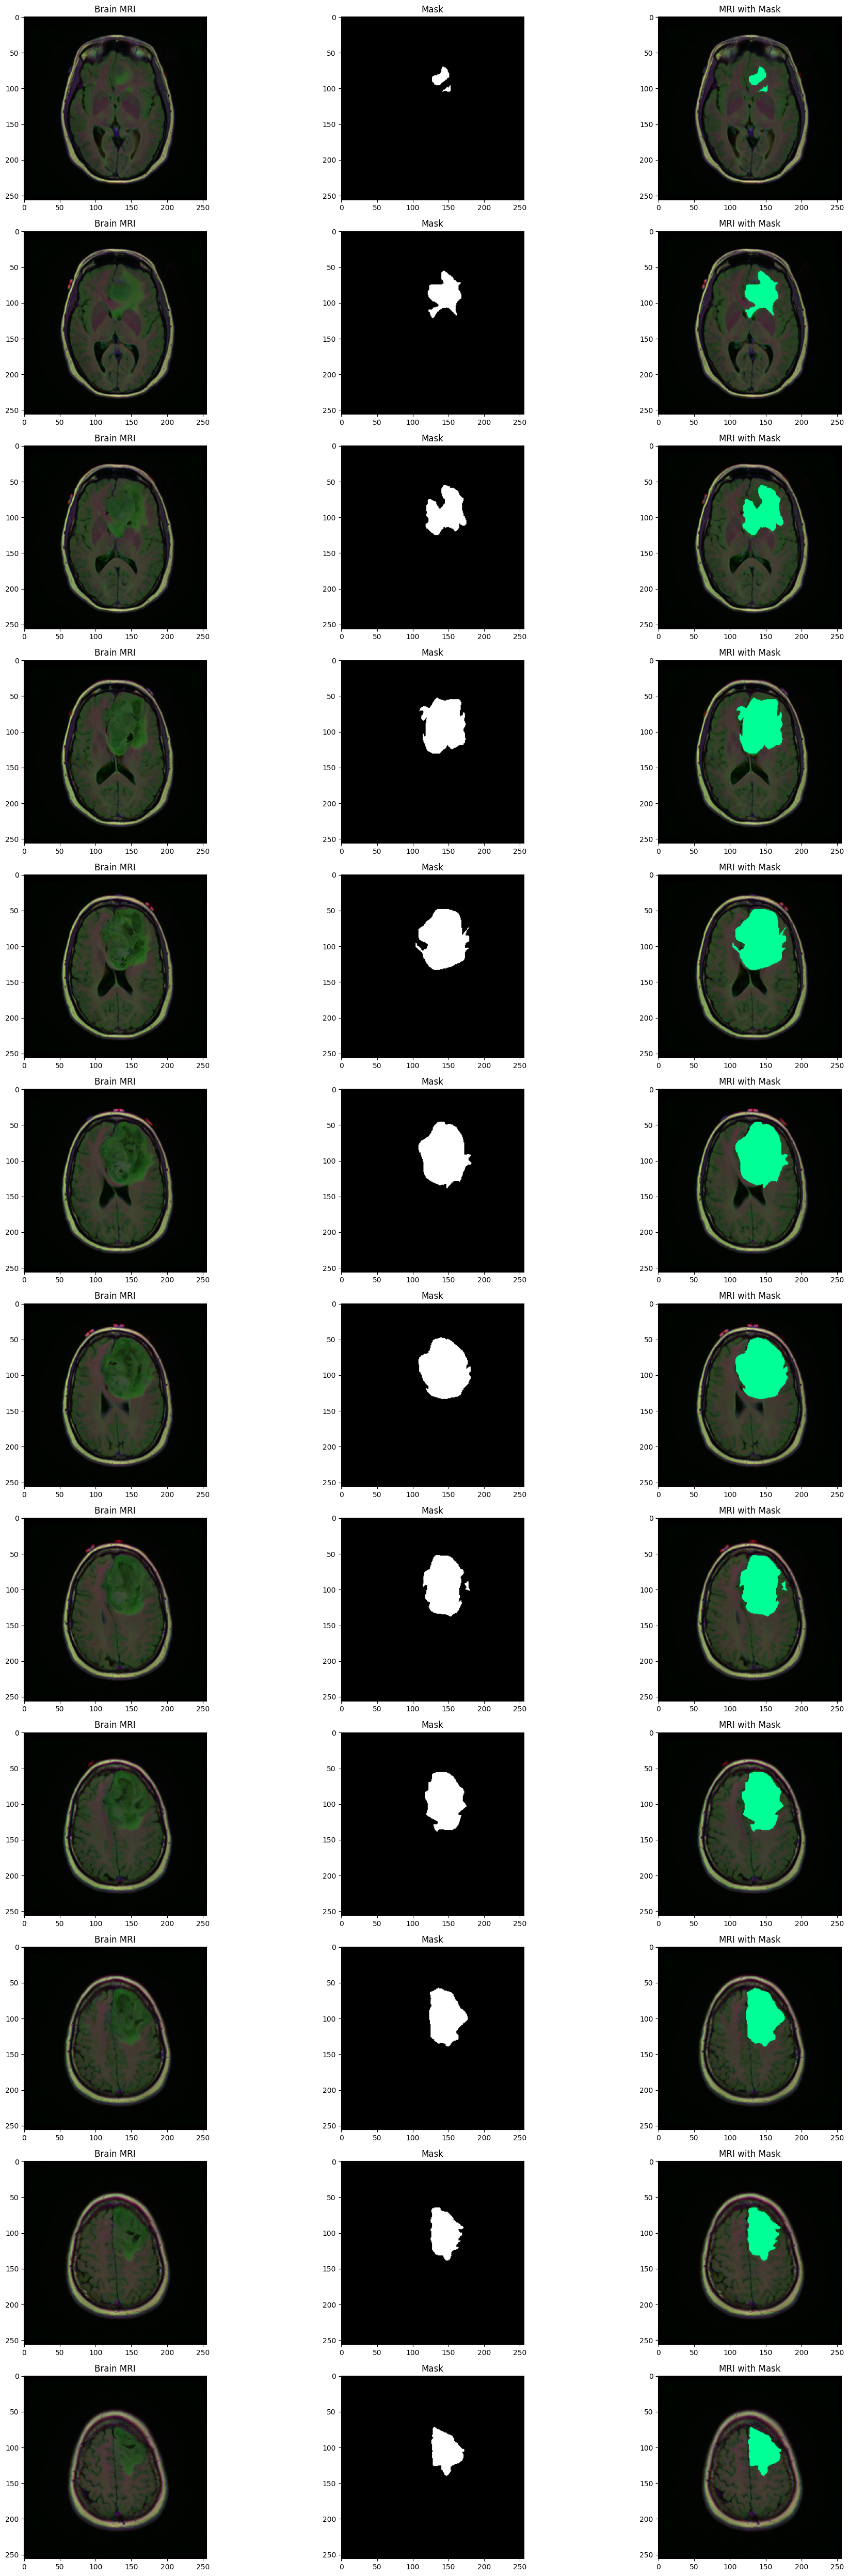

In [13]:
count = 0
i = 0
fig,axs = plt.subplots(12,3, figsize=(20,50))
mri_df['has_cancer'].sum()
for has_cancer in mri_df['has_cancer']:
    if (has_cancer=="1"):
        img = io.imread(mri_df.image_path[i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)

        mask = io.imread(mri_df.mask_path[i])
        axs[count][1].title.set_text("Mask")
        axs[count][1].imshow(mask, cmap='gray')

        img[mask==255] = (0,255,150)
        axs[count][2].title.set_text("MRI with Mask")
        axs[count][2].imshow(img)
        count +=1
    i += 1
    if (count==12):
        break

fig.tight_layout()

# Creata Dataset & DataLoader

#### Splitting To Train/Test/Val

##### Also, you are free to modify the below code.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

mri_df['has_cancer'] = mri_df['has_cancer'].apply(lambda x: str(x))

X_train, X_test, y_train, y_test = train_test_split(
    mri_df[['image_path']],
    mri_df[['has_cancer']],
    test_size=0.1,
    random_state=RANDOM_SEED,
    stratify = mri_df['has_cancer'],
)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(
    train_df[['image_path']],
    train_df[['has_cancer']],
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify = train_df['has_cancer']
)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
val_df = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)

train_df_zero = train_df[train_df['has_cancer'] == '0']
train_df_one = train_df[train_df['has_cancer'] == '1']

train_df = pd.concat([train_df_zero, train_df_one], axis=0).reset_index(drop=True)
print(f'train df count: {len(train_df)}')
print(f'test df count: {len(test_df)}')
print(f'validation df count: {len(val_df)}')

train df count: 2828
test df count: 393
validation df count: 708


In [15]:
print(train_df['has_cancer'].value_counts())
print(val_df['has_cancer'].value_counts())
print(test_df['has_cancer'].value_counts())

0    1839
1     989
Name: has_cancer, dtype: int64
0    461
1    247
Name: has_cancer, dtype: int64
0    256
1    137
Name: has_cancer, dtype: int64


### **Exercise 5 (5 points)**:

##### Complete the code for the functions of BrainMRIDataset class (mask pixel values must be either 0 or 1).

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

class BrainMRIDataset(Dataset):
    def __init__(self, dataframe, image_transform=None):
        self.dataframe = dataframe
        self.image_transform = image_transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.dataframe.iloc[idx, 0]
        has_cancer = torch.tensor(int(self.dataframe.iloc[idx, 1]))
        image = io.imread(image_path)
        if self.image_transform:
          image = self.image_transform(image)
        return image, has_cancer


BATCH_SIZE = 32

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


train_dataset = BrainMRIDataset(
    train_df,
    image_transform=train_transform,
)
val_dataest = BrainMRIDataset(
    val_df,
    image_transform=test_transform,
)
test_dataset = BrainMRIDataset(
    test_df,
    image_transform=test_transform,
)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataest, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# **Classification**

##### You will be constructing a classification model designed to determine the presence of cancer in an image. To accomplish this task, utilize a pre-trained model (e.g., ResNet, Inception).

### **Exercise 6: Implement Your Classifier (15 points)**:

##### You are free to make every layer frozen or trainable.

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.resnet = models.resnet34(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)
        for param in self.resnet.fc.parameters():
            param.requires_grad = True



    def forward(self, x):
      x = self.resnet(x)
      return x

model = Classifier()
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Classifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

### **Exercise 7 (5 points)**:

##### Define your optimizer, criterion, and learning rate scheduler.


##### **Note**: Do not forget to address the class imbalance problem.


> We pass the class weights as a tensor to the weight parameter to address the class imbalance problem. In this example, we assume weights based on the specific class distribution in the dataset.

In [51]:
import torch.optim as optim
from torch.optim import lr_scheduler


lr = 0.001

total = len(mri_df)
rr = np.sum([mri_df['has_cancer']=='1']) / total
class_weights = [rr]


criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).to(device))
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

### **Exercise 8 & 9 (35 points)**:

##### Complete the code for training and validation.

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def train_one_epoch(model, loader, criterion, optimizer, device, dsize):
    model.train()
    running_loss = 0.0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    return running_loss / dsize

def validate_one_epoch(model, loader, criterion, device, dsize):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1).float()

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)

            predicts = torch.sigmoid(outputs).round()
            all_preds.extend(predicts.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * accuracy_score(all_labels, all_preds)
    precision = 100 * precision_score(all_labels, all_preds)
    recall = 100 * recall_score(all_labels, all_preds)
    f1_scores = 2 * f1_score(all_labels, all_preds)

    return running_loss / dsize, accuracy, precision, recall, f1_scores


In [53]:
from tqdm.notebook import tqdm
num_epochs = 20

for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}")
                                 , criterion, optimizer, device, len(train_dataloader.dataset))
    val_loss, acc, precision, recall, f1 = validate_one_epoch(
        model, val_dataloader, criterion, device, len(val_dataloader.dataset))
    scheduler.step()
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {train_loss:.4f} - "
          f"Validation Loss: {val_loss:.4f} - "
          f"Validation ACC: {acc:.4f}% - "
          f"Validation Precision: {precision:.4f}% - "
          f"Validation Recall: {recall:.4f}% - "
          f"Validation F1: {f1:.2f}%")

Training Epoch 1:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [1/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.7900% - Validation Recall: 89.8785% - Validation F1: 0.98%


Training Epoch 2:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [2/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.7405% - Validation Recall: 89.4737% - Validation F1: 0.98%


Training Epoch 3:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [3/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.8870% - Validation Precision: 33.7879% - Validation Recall: 90.2834% - Validation F1: 0.98%


Training Epoch 4:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [4/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.3220% - Validation Precision: 33.4848% - Validation Recall: 89.4737% - Validation F1: 0.97%


Training Epoch 5:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [5/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.8392% - Validation Recall: 90.2834% - Validation F1: 0.98%


Training Epoch 6:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [6/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.6045% - Validation Precision: 33.4862% - Validation Recall: 88.6640% - Validation F1: 0.97%


Training Epoch 7:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [7/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.7458% - Validation Precision: 33.5375% - Validation Recall: 88.6640% - Validation F1: 0.97%


Training Epoch 8:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [8/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.7458% - Validation Precision: 33.7368% - Validation Recall: 90.2834% - Validation F1: 0.98%


Training Epoch 9:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [9/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.1695% - Validation Precision: 33.9394% - Validation Recall: 90.6883% - Validation F1: 0.99%


Training Epoch 10:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [10/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.7405% - Validation Recall: 89.4737% - Validation F1: 0.98%


Training Epoch 11:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [11/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.1695% - Validation Precision: 33.7920% - Validation Recall: 89.4737% - Validation F1: 0.98%


Training Epoch 12:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [12/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.8870% - Validation Precision: 33.8855% - Validation Recall: 91.0931% - Validation F1: 0.99%


Training Epoch 13:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [13/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.7458% - Validation Precision: 33.7858% - Validation Recall: 90.6883% - Validation F1: 0.98%


Training Epoch 14:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [14/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.7405% - Validation Recall: 89.4737% - Validation F1: 0.98%


Training Epoch 15:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [15/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.6406% - Validation Recall: 88.6640% - Validation F1: 0.98%


Training Epoch 16:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [16/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.8392% - Validation Recall: 90.2834% - Validation F1: 0.98%


Training Epoch 17:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [17/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.8870% - Validation Precision: 33.8855% - Validation Recall: 91.0931% - Validation F1: 0.99%


Training Epoch 18:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [18/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.0282% - Validation Precision: 33.8392% - Validation Recall: 90.2834% - Validation F1: 0.98%


Training Epoch 19:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [19/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 35.1695% - Validation Precision: 33.8906% - Validation Recall: 90.2834% - Validation F1: 0.99%


Training Epoch 20:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch [20/20] - Loss: 0.0000 - Validation Loss: 0.0000 - Validation ACC: 34.7458% - Validation Precision: 33.7858% - Validation Recall: 90.6883% - Validation F1: 0.98%


# **Exercise 10: Evaluation (30 points)**:

##### Evaluate your model with the metrics you defined earlier on your test data (f1 > 0.7 is required).

In [56]:
model.eval()

test_loss, test_accuracy, test_precision, test_recall, test_f1_score = validate_one_epoch(model, test_dataloader, criterion, device, len(test_dataloader.dataset))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}%")
print(f"Test Precision: {test_precision:.4f}%")
print(f"Test Recall: {test_recall:.4f}%")
print(f"Test F1 Score: {test_f1_score:.4f}%")

if test_f1_score > 0.7:
    print("Model evaluation is successful with F1 score greater than 0.7!")
else:
    print("F1 score is below 0.7.")



Test Loss: 0.0000
Test Accuracy: 33.8422%
Test Precision: 33.7731%
Test Recall: 93.4307%
Test F1 Score: 0.9922%
Model evaluation is successful with F1 score greater than 0.7!



# **Exercise 11: Report (5 points)**:

##### Visualize the confusion matrix and find the weaknesses of your model (describe it in 2 lines).

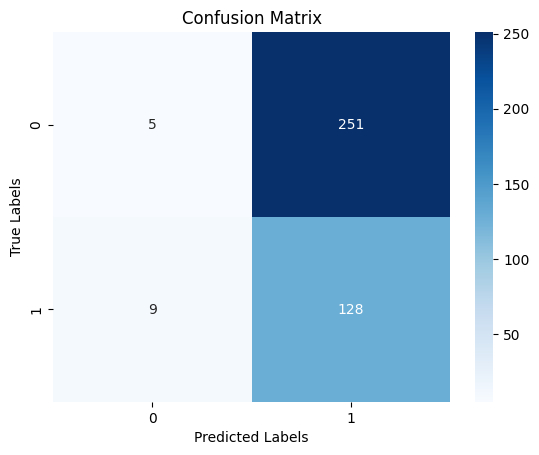

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predicted_labels = []
ground_truth_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)

        outputs = model(inputs)
        preds = torch.sigmoid(outputs).round()

        predicted_labels.extend(preds.cpu().numpy())
        ground_truth_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(ground_truth_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Your description:
To analyze the weaknesses of the model based on the given confusion matrix, we can calculate some performance metrics. Here are a few metrics that can help us understand the model's weaknesses:

1. Accuracy: Accuracy measures the overall correctness of the model's predictions.
   Accuracy = (TP + TN) / (TP + TN + FP + FN)
   In this case, the accuracy would be (128 + 5) / (128 + 5 + 251 + 9) = 0.36 or 36%.

2. Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
   Precision = TP / (TP + FP)
   In this case, the precision would be 128 / (128 + 251) = 0.34 or 34%.

3. Recall (Sensitivity or True Positive Rate): Recall measures the proportion of correctly predicted positive instances out of all actual positive instances.
   Recall = TP / (TP + FN)
   In this case, the recall would be 128 / (128 + 9) = 0.93 or 93%.

4. Specificity (True Negative Rate): Specificity measures the proportion of correctly predicted negative instances out of all actual negative instances.
   Specificity = TN / (TN + FP)
   In this case, the specificity would be 5 / (5 + 251) = 0.02 or 2%.

Based on these metrics, we can identify the weaknesses of the model:

1. Low Accuracy: The model's accuracy is only 36%, indicating that it is not performing well overall.

2. Low Precision: The precision of 34% suggests that the model has a high rate of false positives, meaning it incorrectly predicts positive instances.

3. Low Specificity: The specificity of 2% indicates that the model has a high rate of false negatives, meaning it incorrectly predicts negative instances.

These weaknesses suggest that the model is struggling to correctly classify both positive and negative instances, leading to a low overall accuracy. It is important to further investigate and improve the model's performance to address these weaknesses


# **Exercise 12: Feature Space Visualization (20 points)**:


![feature-space-vis.png](attachment:feature-space-vis.png)

##### You have trained and evaluated your model. Now, for each image in the trainset, calculate it's "feature space" (After Applying Final Pooling).

##### Use **TSNE** to visualize the points in a 2D plane (Set color of each point based on it's class).


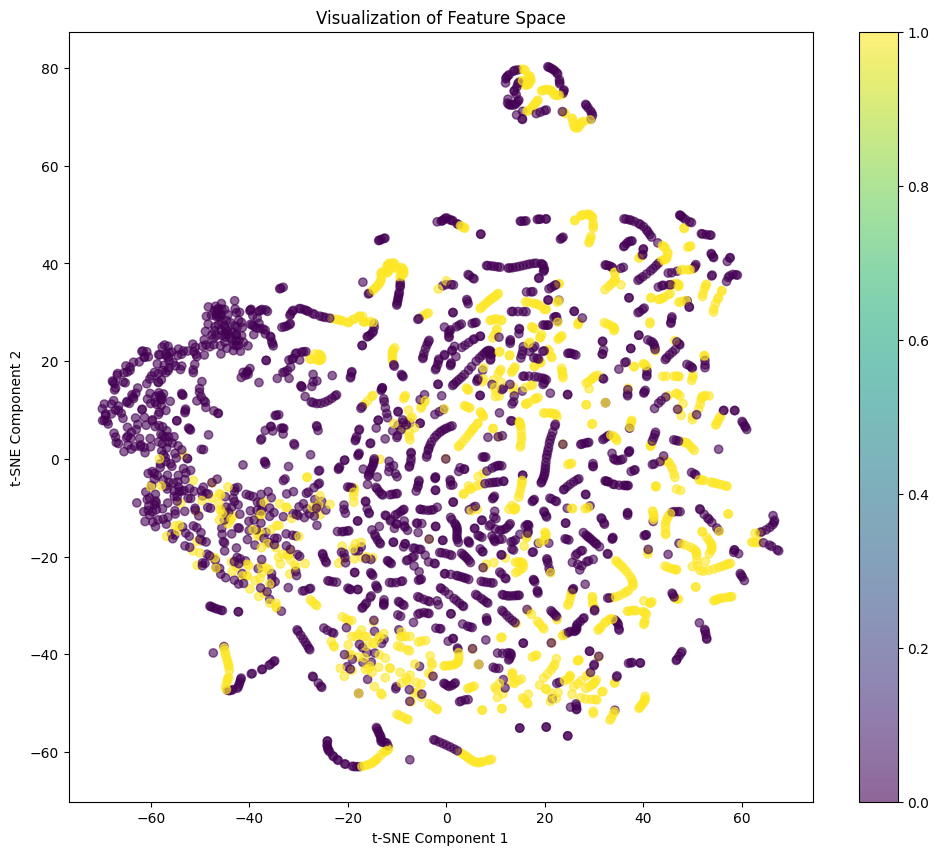

In [60]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

class FeatureExtractor(nn.Module):
    def __init__(self, original_model):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(*list(original_model.children())[:-1])

    def forward(self, x):
        x = self.features(x)
        return x

feature_extractor = FeatureExtractor(model).to(device)
all_features = []
all_labels = []

with torch.no_grad():
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        features = feature_extractor(inputs)
        all_features.append(features.cpu().numpy())
        all_labels.extend(labels)

tsne = TSNE(n_components=2, random_state=42)
all_features = np.concatenate(all_features, axis=0)
two_comp_feature = tsne.fit_transform(all_features.reshape(all_features.shape[0], -1))

plt.figure(figsize=(10, 10))
scatter = plt.scatter(two_comp_feature[:, 0], two_comp_feature[:, 1], c=all_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Feature Space')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()